(3, 450, 800)
(3, 486, 729)


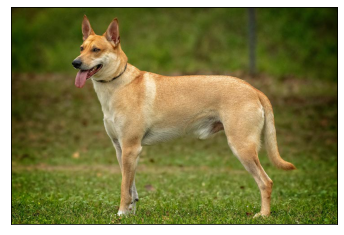

In [1]:
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path
import PIL
import torchvision.transforms.functional as F
import numpy as np
import torch
import matplotlib.pyplot as plt

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

def reshape_img(width: int, height: int, image: PIL.Image) -> np.array:
    #resized_image = image.resize((width, height), PIL.Image.BILINEAR)
    resized_np_image = np.asarray(image, dtype=np.float32)
    
    resized_np_image = np.moveaxis(resized_np_image, [0, 1 ,2], [1, 2, 0])
    return resized_np_image

print(np.shape(reshape_img(256, 256, PIL.Image.open(r"images/dog.jpg"))))
print(np.shape(reshape_img(256, 256, PIL.Image.open(r"images/dog3.jpg"))))
dog1_int = torch.from_numpy(reshape_img(256, 256, PIL.Image.open(r"images/dog.jpg"))).cuda()
dog2_int =  torch.from_numpy(reshape_img(256, 256, PIL.Image.open(r"images/dog3.jpg"))).cuda()

grid = make_grid([dog2_int], normalize=True)
show(grid)

In [14]:
from torchvision.transforms.functional import convert_image_dtype


batch_int = torch.stack([ dog2_int])
batch = convert_image_dtype(batch_int, dtype=torch.float)

In [15]:
from torchvision.models.segmentation import fcn_resnet50


model = fcn_resnet50(pretrained=True, progress=False).cuda()
model = model.eval()

normalized_batch = F.normalize(batch, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
output = model(normalized_batch)['out']
print(output.shape, output.min().item(), output.max().item())

torch.Size([1, 21, 486, 729]) -652.9453125 1478.452880859375


In [16]:
sem_classes = [
    '__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'
]
sem_class_to_idx = {cls: idx for (idx, cls) in enumerate(sem_classes)}

normalized_masks = torch.nn.functional.softmax(output, dim=1)

dog_and_boat_masks = [
    normalized_masks[img_idx, sem_class_to_idx[cls]]
    for img_idx in range(batch.shape[0])
    for cls in sem_classes
]
show(dog_and_boat_masks)

In [40]:
np.shape(out)

(3, 256, 256)

In [1]:
a = [3,5,6,7]
b = [x*2 for x in a]

b = []
for x,y in enumerate(a):
    print(x,y)

0 3
1 5
2 6
3 7


In [109]:
from torchvision.models.segmentation import fcn_resnet50
import torch.nn.functional as F
import torch
from torchvision import transforms

out_torch = torch.from_numpy(out).cuda()
out_torch = torch.unsqueeze(out_torch, 0)

model = fcn_resnet50(pretrained=True, progress=False).cuda()
model = model.eval()

normalized_batch = transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))(out_torch)
output = model(normalized_batch)['out']
output = torch.nn.Softmax(dim=1)(output)
print(output)

tensor([[[[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          ...,
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.2299e-07,
           1.2299e-07, 1.2299e-07],
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.2299e-07,
           1.2299e-07, 1.2299e-07],
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.2299e-07,
           1.2299e-07, 1.2299e-07]],

         [[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.7976

In [1]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import storage
from firebase_admin.storage import Client

ImportError: cannot import name 'Client' from 'firebase_admin.storage' (C:\Users\ercih\miniconda3\envs\pytorch\lib\site-packages\firebase_admin\storage.py)

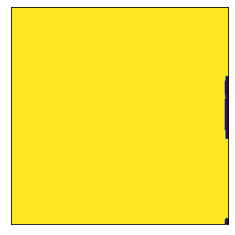

In [111]:
output = torch.squeeze(output)
dog_mask = output[0, :, :]
show(dog_mask)

In [50]:
import matplotlib.pyplot as plt

In [60]:
dog_mask_np = dog_mask.cpu().detach().numpy()
plt.show(dog_mask_np)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()